Import required libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

Load the dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Checking the data about and preprocess if required

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

display(X.head())
# display(X.dtypes)
print("The dimension of X is",X.shape)
print("Response variable is: ",data.target_names[0])
print("Predictor variables are:\n",data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The dimension of X is (569, 30)
Response variable is:  malignant
Predictor variables are:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Split the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (455, 30)
Test set size: (114, 30)


### Fully Grown Tree

In [5]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

print("Train Accuracy:", dtree.score(X_train, y_train))
print("Test Accuracy:", dtree.score(X_test, y_test))

print('\nTree depth:', dtree.tree_.max_depth)
print('Tree node count:', dtree.tree_.node_count)

Train Accuracy: 1.0
Test Accuracy: 0.9122807017543859

Tree depth: 9
Tree node count: 43


Plot tree (Optional)

[Text(0.6390086206896551, 0.95, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'), Text(0.4849137931034483, 0.85, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'), Text(0.5619612068965517, 0.8999999999999999, 'True  '), Text(0.38362068965517243, 0.75, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'), Text(0.28448275862068967, 0.65, 'worst fractal dimension <= 0.055\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'), Text(0.25, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.31896551724137934, 0.55, 'mean concavity <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'), Text(0.22413793103448276, 0.45, 'area error <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'), Text(0.13793103448275862, 0.35, 'smoothness error <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'), Text(0.06896551724137931, 0.25, 'mean texture <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'), Text(0.03448275862

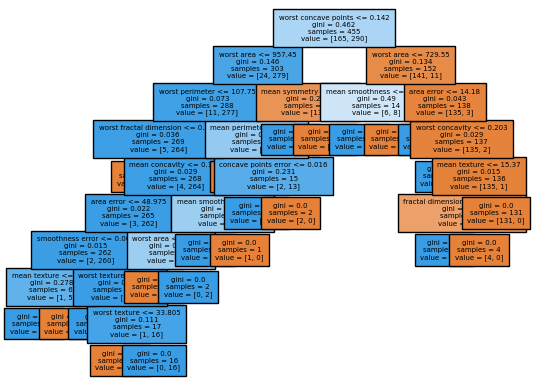

In [6]:
figsize = (20, 10)
print(plot_tree(dtree, filled=True, feature_names=X_train.columns, fontsize=5))

Cost complexicity prunning

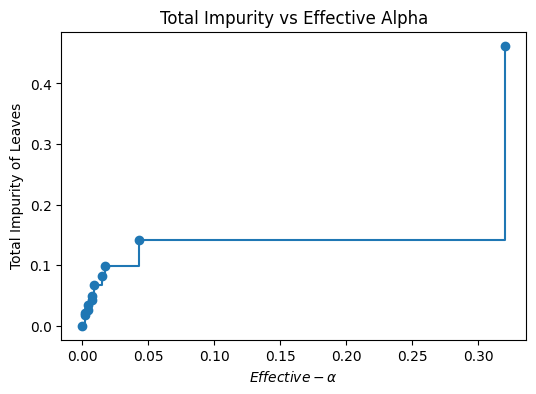

In [7]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel(r'$Effective-\alpha$')
plt.ylabel('Total Impurity of Leaves')
plt.title('Total Impurity vs Effective Alpha')
plt.show()

Total number of unique alpha values:  10


Text(0.5, 0, 'Effective-$\\alpha$')

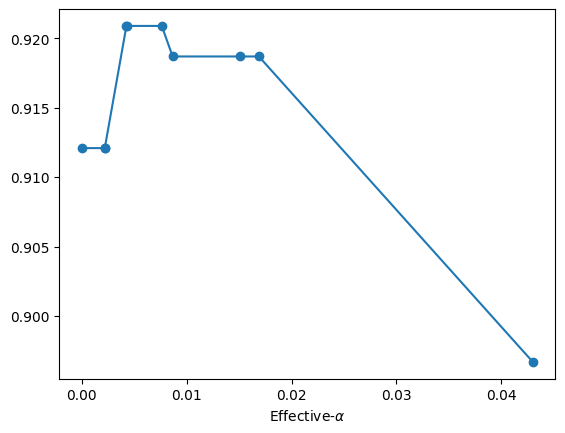

In [8]:
# Remove the last tree (only root), not useful for accuracy
ccp_alphas = np.unique(ccp_alphas)[:-1]
print("Total number of unique alpha values: ",len(ccp_alphas))

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

cv_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]
plt.plot(ccp_alphas, cv_scores, marker='o')
plt.xlabel(r'Effective-$\alpha$')

In [9]:
# Best alpha value
best_alpha = path.ccp_alphas[np.argmax(cv_scores)]
print("Best alpha value: ",best_alpha)

Best alpha value:  0.004249515118959747


### Pruned tree

Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9473684210526315

Tree depth: 5
Tree node count: 21
[Text(0.47058823529411764, 0.9166666666666666, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'), Text(0.23529411764705882, 0.75, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'), Text(0.3529411764705882, 0.8333333333333333, 'True  '), Text(0.11764705882352941, 0.5833333333333334, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'), Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.036\nsamples = 269\nvalue = [5, 264]'), Text(0.17647058823529413, 0.4166666666666667, 'mean perimeter <= 91.92\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'), Text(0.11764705882352941, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'), Text(0.23529411764705882, 0.25, 'concave points error <= 0.016\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'), Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalu

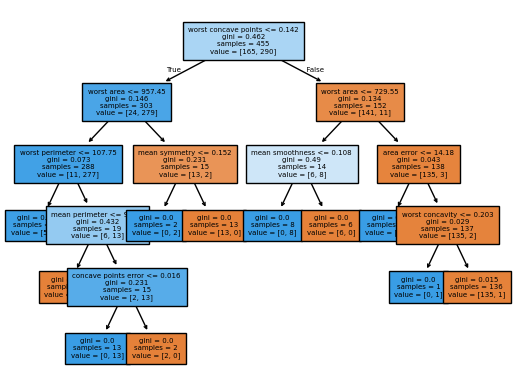

In [10]:
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

print("Train Accuracy:", pruned_tree.score(X_train, y_train))
print("Test Accuracy:", pruned_tree.score(X_test, y_test))

print('\nTree depth:', pruned_tree.tree_.max_depth)
print('Tree node count:', pruned_tree.tree_.node_count)

figsize = (20, 10)
print(plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, fontsize=5))

Nodes and depth vs alpha

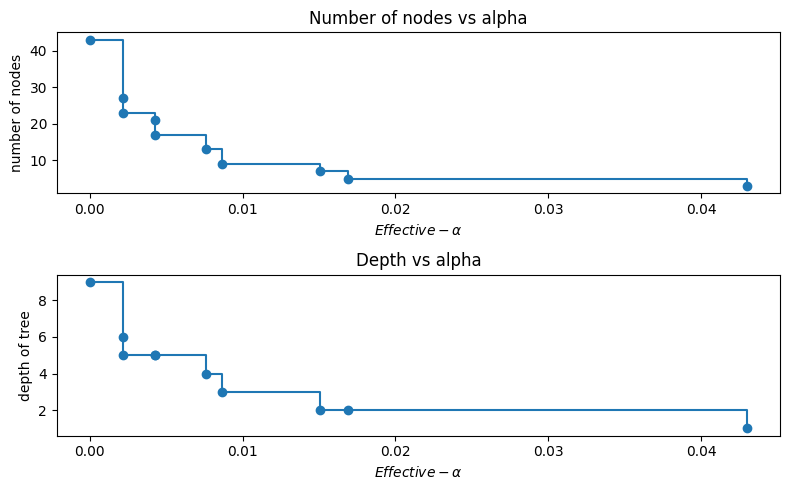

In [11]:
# clfs already calculated before, so we can directly plot it
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(8, 5))

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel(r'$Effective-\alpha$')
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depths, marker="o", drawstyle="steps-post")
ax[1].set_xlabel(r'$Effective-\alpha$')
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

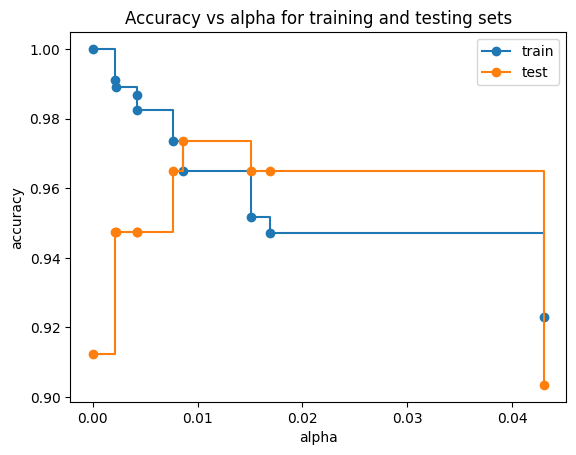

In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

Store as dataframe

In [13]:
cv_data = pd.DataFrame({
      'alpha': ccp_alphas,
      'cv_scores': cv_scores,
      'node_count': node_counts,
      'depth': depths,
      'train_score': train_scores,
      'test_score': test_scores
})
print(cv_data.head())
#pd.save_csv(cv_data, 'regtree_california_housing_cv_data.csv', index=False)

      alpha  cv_scores  node_count  depth  train_score  test_score
0  0.000000   0.912088          43      9     1.000000    0.912281
1  0.002165   0.912088          27      6     0.991209    0.947368
2  0.002182   0.912088          23      5     0.989011    0.947368
3  0.004250   0.920879          21      5     0.986813    0.947368
4  0.004268   0.920879          17      5     0.982418    0.947368


### Logistic regression

In [ ]:
from statsmodels.api import OLS

In [17]:
model = OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              143.6
Date:                Wed, 20 Aug 2025   Prob (F-statistic):                   6.83e-202
Time:                        20:32:33   Log-Likelihood:                          5.2158
No. Observations:                 455   AIC:                                      49.57
Df Residuals:                     425   BIC:                                      173.2
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------